In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
cars = pd.read_table("D:/mpg.txt",delim_whitespace=True,names=cols)

In [4]:
cars = cars[cars.horsepower!='?']

In [5]:
cars.horsepower = cars.horsepower.astype(float)


In [6]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

### Identifying predictor/input variables

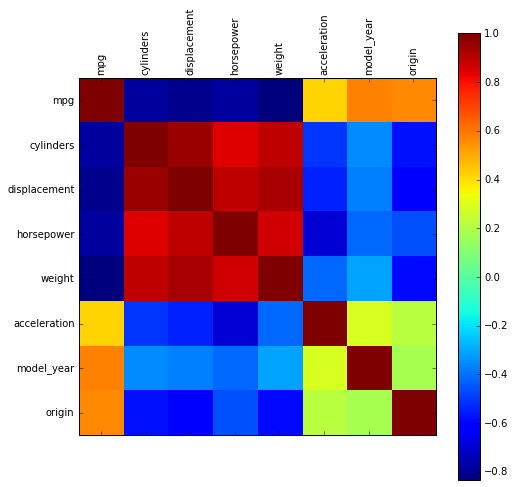

In [7]:
corr = cars.corr()
fig, ax = plt.subplots(1,1,figsize=(8,8))
cax = ax.matshow(corr)#,cmap = plt.get_cmap("Blues")
fig.colorbar(cax)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
plt.show()

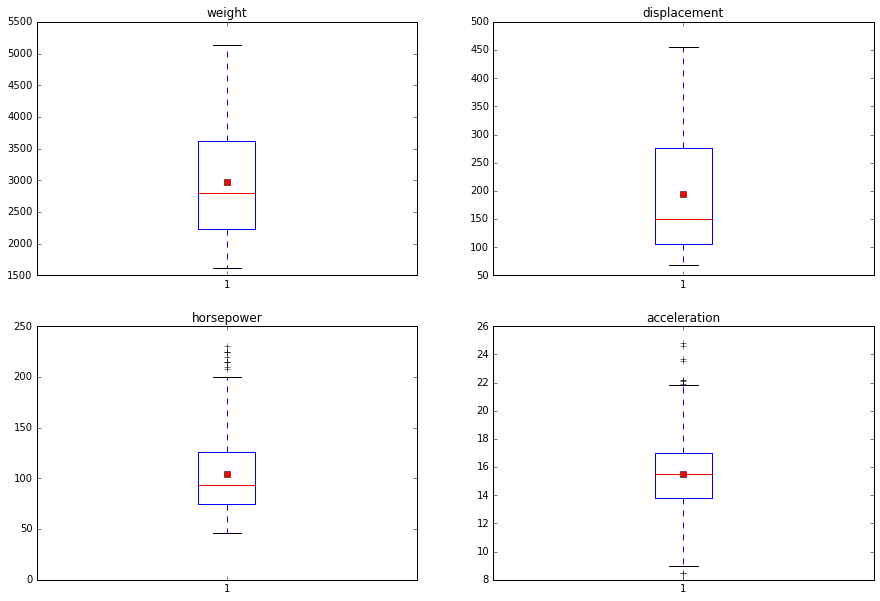

In [8]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(15,10))
ax1[0].boxplot(cars.weight,showmeans=True)
ax1[0].set_title('weight')
ax1[1].boxplot(cars.displacement,showmeans=True)
ax1[1].set_title('displacement')
ax2[0].boxplot(cars.horsepower,showmeans=True)
ax2[0].set_title('horsepower')
ax2[1].boxplot(cars.acceleration,showmeans=True)
ax2[1].set_title('acceleration')
plt.show()

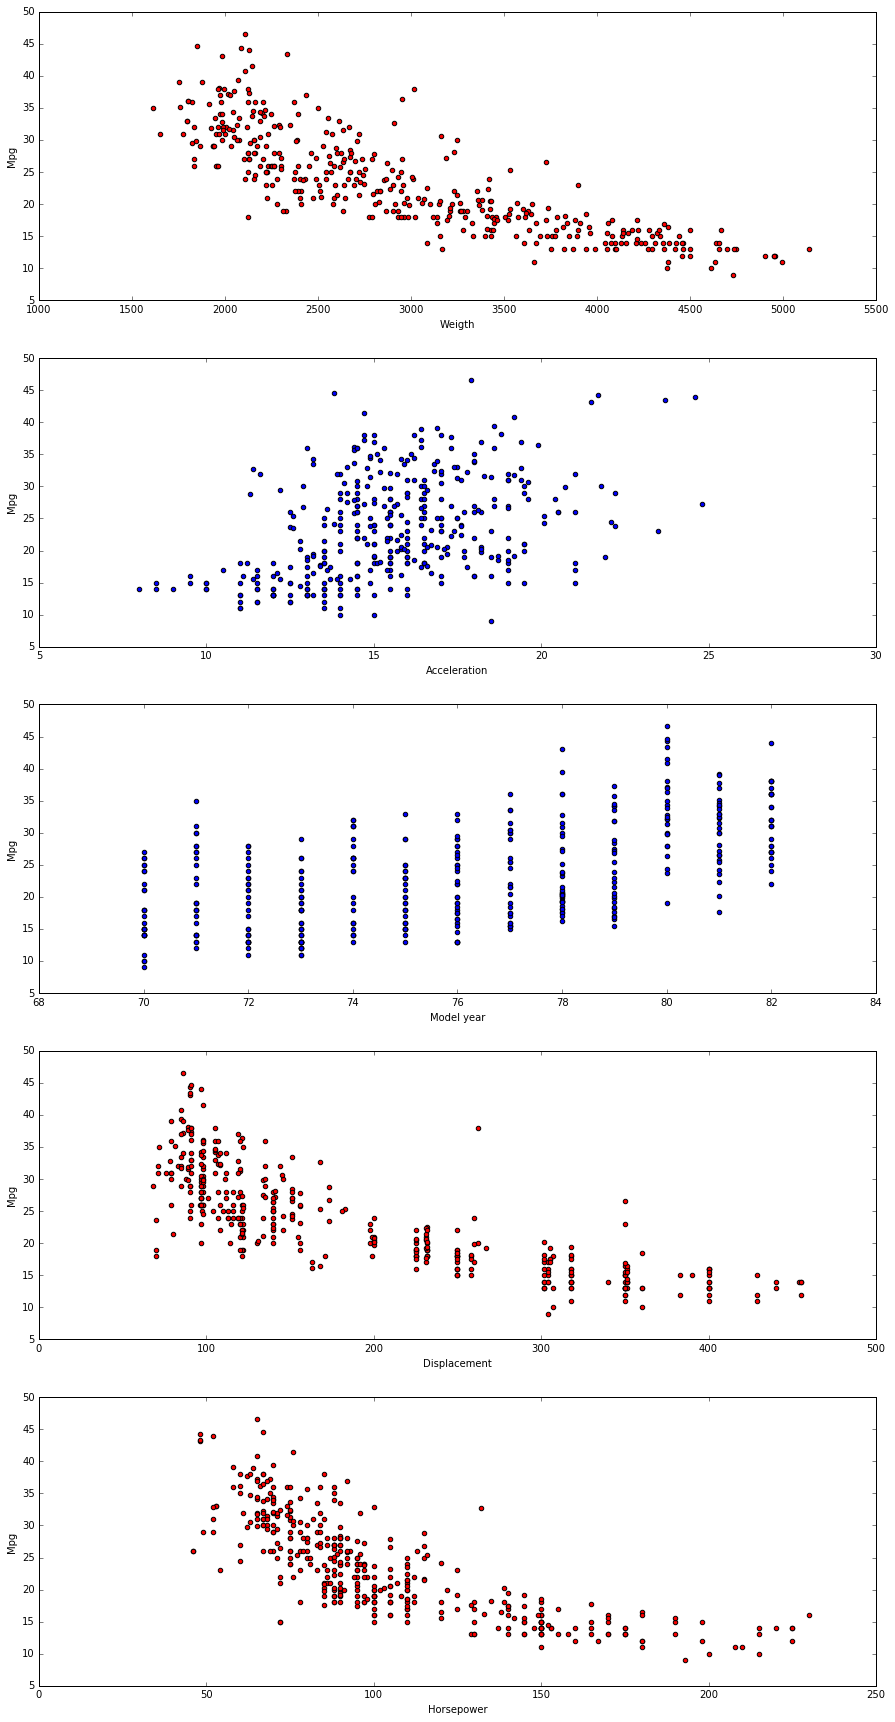

In [9]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(15,30))

ax1.scatter(cars['weight'],cars['mpg'],c='r')
ax1.set_xlabel("Weigth")
ax1.set_ylabel('Mpg')

ax2.scatter(cars['acceleration'],cars['mpg'])
ax2.set_xlabel("Acceleration")
ax2.set_ylabel('Mpg')

ax3.scatter(cars['model_year'],cars['mpg'])
ax3.set_xlabel("Model year")
ax3.set_ylabel('Mpg')

ax4.scatter(cars['displacement'],cars['mpg'],c='r')
ax4.set_xlabel("Displacement")
ax4.set_ylabel('Mpg')

ax5.scatter(cars['horsepower'],cars['mpg'],c='r')
ax5.set_xlabel("Horsepower")
ax5.set_ylabel('Mpg')

plt.show()



### Pearson r calculation of correlleration

In [10]:
from scipy.stats import pearsonr

In [11]:
weigth_corr,_= pearsonr(cars.weight,cars.mpg)
acc_corr,_= pearsonr(cars.acceleration,cars.mpg)
model_year_corr,_= pearsonr(cars.model_year,cars.mpg)
displcement_corr,_= pearsonr(cars.displacement,cars.mpg)
horsepower_corr,_= pearsonr(cars.horsepower,cars.mpg)
print("weigth vs mpg: {:.2f}\n\nacceleration vs mpg: {:.2f}\n\nmodel year vs mpg: {:.2f}\n\ndisplacement vs mpg: {:.2f}\n\nHorsepower vs mpg: {:.2f}".format(weigth_corr,acc_corr,model_year_corr,displcement_corr,horsepower_corr))

weigth vs mpg: -0.83

acceleration vs mpg: 0.42

model year vs mpg: 0.58

displacement vs mpg: -0.81

Horsepower vs mpg: -0.78


based on the above there is a strong negative correlation between weight,engine displacement,horsepower and mpg.
there exsists a moderate positive correlation between model year,acceleration and mpg

## Initial ML model: Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
lr = LinearRegression()

In [14]:
lr.fit(cars[['weight']],cars[['mpg']])
predictions_w = lr.predict(cars[['weight']])

lr.fit(cars[['horsepower']],cars[['mpg']])
predictions_h = lr.predict(cars[['horsepower']])

lr.fit(cars[['displacement']],cars[['mpg']])
predictions_d = lr.predict(cars[['displacement']])

lr.fit(cars[['acceleration']],cars[['mpg']])
predictions_a = lr.predict(cars[['acceleration']])

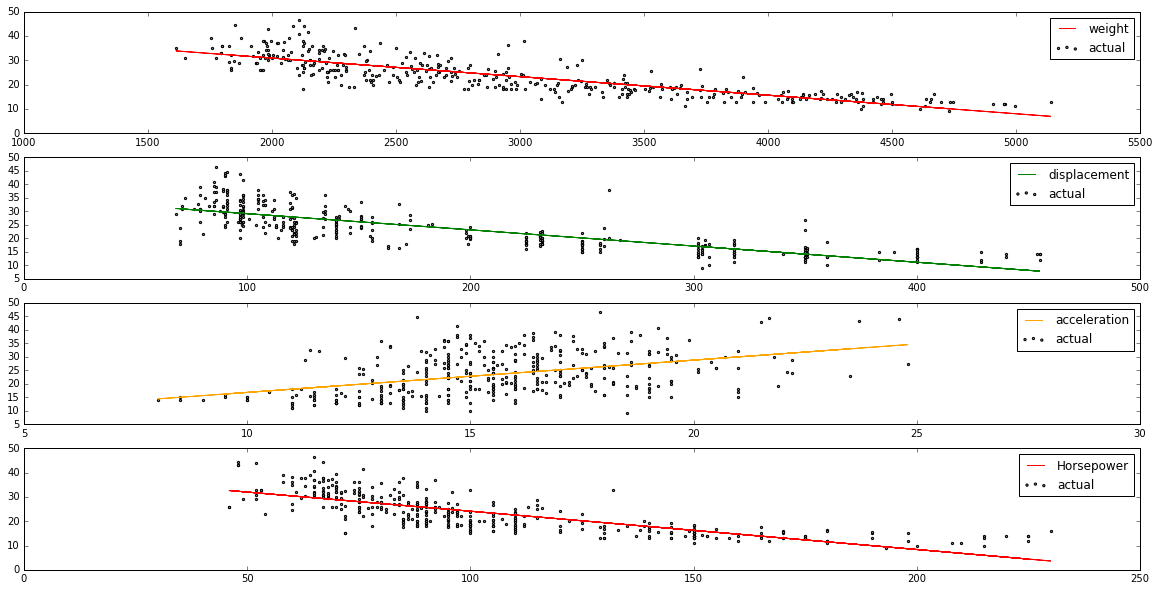

In [15]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,10))

ax1.scatter(cars.weight,cars.mpg,label="actual",c='gray',s=5)
ax1.plot(cars.weight,predictions_w,c="r",label="weight")
ax1.legend()

ax2.scatter(cars.displacement,cars.mpg,label="actual",c='gray',s=5)
ax2.plot(cars.displacement,predictions_d,c="g",label='displacement')
ax2.legend()

ax3.scatter(cars.acceleration,cars.mpg,label="actual",c='gray',s=5)
ax3.plot(cars.acceleration,predictions_a,c="orange",label='acceleration')
ax3.legend()

ax4.scatter(cars.horsepower,cars.mpg,label="actual",c='gray',s=5)
ax4.plot(cars.horsepower,predictions_h,c="r",label="Horsepower")
ax4.legend()




### Calculating correlations: root mean squared error & R squared

In [16]:
from sklearn.metrics import mean_squared_error


In [17]:
rmse_w = mean_squared_error(predictions_w,cars.mpg) ** 0.5
rmse_d = mean_squared_error(predictions_d,cars.mpg) ** 0.5
rmse_a = mean_squared_error(predictions_a,cars.mpg) ** 0.5
rmse_h = mean_squared_error(predictions_h,cars.mpg) ** 0.5

In [18]:
print("rmse\tr-squared")
print("{:.2f}\t{:5.2f}\t weight\n{:.2f}\t{:5.2f}\t displacement\n{:.2f}\t{:5.2f}\t acceleration\n{:.2f}\t{:5.2f}\t horse power"\
      .format(rmse_w,weigth_corr,rmse_d,displcement_corr,rmse_a,acc_corr,rmse_h,horsepower_corr))

rmse	r-squared
4.32	-0.83	 weight
4.62	-0.81	 displacement
7.06	 0.42	 acceleration
4.89	-0.78	 horse power


## Regularizing input variables: Lasso Regression
finding the optimum input variable combination to minimize high bias vs high variablility


In [19]:
from sklearn.linear_model import Lasso

In [20]:
model_lasso = Lasso()
model_lasso.fit(cars[['weight','horsepower','displacement','acceleration']],cars['mpg'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
model_lasso.predict(cars[['weight','horsepower','displacement','acceleration']])
print(model_lasso.coef_)

[-0.00544706 -0.03906559 -0.00581522  0.        ]


based on the above results acceleration is has a coefficient of 0 and thus does not contribute to the prediction

In [22]:
model_lasso.fit(cars[['weight','horsepower','displacement']],cars['mpg'])
model_lasso.predict(cars[['weight','horsepower','displacement']])
print(model_lasso.coef_)

[-0.00544706 -0.03906552 -0.00581524]


In [23]:
model_lasso.fit(cars[['weight','horsepower']],cars['mpg'])
model_lasso.predict(cars[['weight','horsepower']])
print(model_lasso.coef_)

[-0.00589429 -0.04471577]


In [24]:
model_lasso.fit(cars[['weight','displacement']],cars['mpg'])
model_lasso.predict(cars[['weight','displacement']])
print(model_lasso.coef_)

[-0.00582299 -0.01586131]


weight and horspower seem to contibute the most to the model

In [25]:
lr.fit(cars[['weight','horsepower']],cars['mpg'])
predictions_w_h = lr.predict(cars[['weight','horsepower']])

lr.fit(cars[['weight','displacement']],cars['mpg'])
predictions_w_d = lr.predict(cars[['weight','displacement']])

In [26]:
mean_squared_error(predictions_w_d,cars.mpg) ** 0.5


4.2768682932054531

In [27]:
mean_squared_error(predictions_w_h,cars.mpg) ** 0.5

4.2239131670230377

In [28]:
pearsonr(predictions_w_d,cars.mpg)

(0.8360423355180816, 1.0309462484422372e-103)

In [29]:
pearsonr(predictions_w_h,cars.mpg)

(0.84046134576780784, 7.9563551184655654e-106)

based on the above the combination of weight and horsepower contribute to a 84% accuracy in our predictive model against the training set and the accurancy is with in + or - 8mpg difference at 95% confidence intervels

## K Fold cross validation analysis

In [30]:
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [31]:
feature_cols = ['weight','displacement','horsepower']
x = cars[feature_cols]
y = cars.mpg
estimator = SVR(kernel="linear")
selector = RFE(estimator,2,step=1)
s = selector.fit(x,y)

In [32]:
s.support_

array([False,  True,  True], dtype=bool)

In [78]:
lr = LinearRegression()
score = cross_val_score(lr,X=cars[['displacement','horsepower']],y=cars.mpg,cv=10,scoring="mean_squared_error")
np.sqrt(-score).mean()

4.6849530197052971

In [79]:
score = cross_val_score(lr,X=cars[['weight','horsepower']],y=cars.mpg,cv=10,scoring="mean_squared_error")
np.sqrt(-score).mean()

4.312696935950167

based on the above wight and horsepower will gives an RMSE of 4.31 which means 95% of our prediction will be with in a + or - 8.62 mpg variance